In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import torch
import torch.nn as nn
from PIL import Image

In [4]:
'''
Created on Apr 28, 2019

@author: deckyal
'''

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls '/content/drive/My Drive/DeepLearningLabs/Lab2/data/'
myDrive = '/content/drive/My Drive/DeepLearningLabs/Lab2/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cat.10000.jpg  hr-train.npy   mnist	   res-test.npy   vgg-train.npy
CatDog	       inc.pt	      model.ckpt   res-train.npy
hr.pt	       inc-test.npy   models.ckpt  vgg.pt
hr-test.npy    inc-train.npy  res.pt	   vgg-test.npy


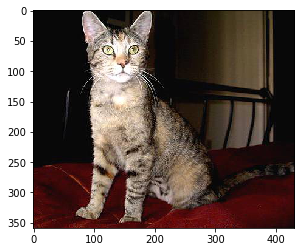

In [8]:
catImage = Image.open(myDrive+'/cat.10000.jpg')
plt.imshow(catImage, cmap='gray')
plt.show()


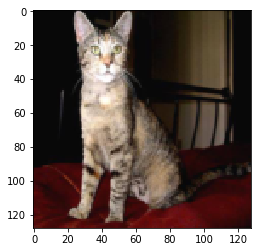

In [9]:
import torchvision.transforms as transforms

rs =transforms.Resize((128,128))
plt.imshow(rs(catImage))
plt.show()

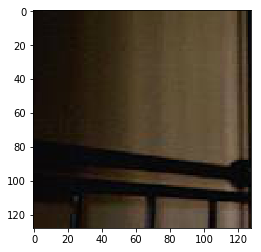

In [10]:
crop = transforms.RandomCrop(128)
plt.imshow(crop(catImage))
plt.show()

In [11]:
norm = transforms.Normalize(mean = (.5,.5,.5), std = (.5,.5,.5))
print(norm(catImage))

TypeError: ignored

In [0]:
toTensor = transforms.ToTensor()
print(norm(toTensor(catImage)))


tensor([[[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         ...,
         [-0.3961, -0.3490, -0.3412,  ..., -0.8196, -0.8118, -0.8118],
         [-0.3804, -0.3255, -0.3098,  ..., -0.8431, -0.8431, -0.8275],
         [-0.2627, -0.1922, -0.2157,  ..., -0.8667, -0.8588, -0.8510]],

        [[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         ...,
         [-0.8980, -0.8510, -0.8431,  ..., -0.9294, -0.9373, -0.9373],
         [-0.8667, -0.8118, -0.8039,  ..., -0.9373, -0.9373, -0.9373],
         [-0.7490, -0.6784, -0.6941,  ..., -0.9294, -0.9373, -0.9451]],

        [[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0

In [0]:
tr = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean = (.5,.5,.5), std = (.5,.5,.5))
        ])
print(tr(catImage))

tensor([[[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         ...,
         [-0.3961, -0.3490, -0.3412,  ..., -0.8196, -0.8118, -0.8118],
         [-0.3804, -0.3255, -0.3098,  ..., -0.8431, -0.8431, -0.8275],
         [-0.2627, -0.1922, -0.2157,  ..., -0.8667, -0.8588, -0.8510]],

        [[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         ...,
         [-0.8980, -0.8510, -0.8431,  ..., -0.9294, -0.9373, -0.9373],
         [-0.8667, -0.8118, -0.8039,  ..., -0.9373, -0.9373, -0.9373],
         [-0.7490, -0.6784, -0.6941,  ..., -0.9294, -0.9373, -0.9451]],

        [[-0.9373, -0.9373, -0.9373,  ..., -0.9373, -0.9373, -0.9373],
         [-0.9373, -0.9373, -0.9373,  ..., -0